In [85]:
!pip install spacy

In [86]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------- -------------------------------- 2.4/12.8 MB 19.1 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 20.1 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 21.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 19.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [87]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [88]:
#read the data 
reviews_nodevtype=pd.read_csv("steam_reviews.csv")

In [89]:
reviews_nodevtype

,game_title,appid,recommendationid,review,cleaned_reviews,sentiment
0,Rust,252490,177409644,Rust is a great game. It is like real life if ...,rust is a great game it is like real life if t...,NEU
1,Rust,252490,177619447,This game makes me want to kill myself. It's s...,this game makes me want to kill myself its so ...,NEG
2,Rust,252490,178793028,"Great game very unique and grindy, which I per...",great game very unique and grindy which i pers...,POS
3,Rust,252490,177844978,[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\...,hmy irusti review hours inh bratingb hour...,NEG
4,Rust,252490,178578421,"Great fun, very addictive and highly toxic... ...",great fun very addictive and highly toxic prep...,NEG
...,...,...,...,...,...,...
951,TEKKEN 8,1778820,176290177,If you're on the fence I would not buy this pr...,if youre on the fence i would not buy this pro...,NEG
952,TEKKEN 8,1778820,173845976,The most degenerate modern fighting game on th...,the most degenerate modern fighting game on th...,NEG
953,TEKKEN 8,1778820,175721187,---{ Graphics }---\n☐ You forget what reality ...,graphics you forget what reality is beauti...,NEU
954,Dofus,254300,49335213,I've been waiting for this to be on steam for ...,ive been waiting for this to be on steam for s...,POS


the following code was written with the help of ChatGPT

In [90]:
#add type of developer to dataframe 
developers = pd.read_csv("is310-final-project-data-2.csv")

# Merge the DataFrames on 'game_title' (df2) and 'name' (df1)
merged_df = reviews_nodevtype.merge(developers[['name', 'type_of_developer', 'simplified_category']], 
                      left_on='game_title', 
                      right_on='name', 
                      how='left')

# Drop the 'name' column if not needed after the merge
merged_df = merged_df.drop(columns=['name'])

merged_df

,game_title,appid,recommendationid,review,cleaned_reviews,sentiment,type_of_developer,simplified_category
0,Rust,252490,177409644,Rust is a great game. It is like real life if ...,rust is a great game it is like real life if t...,NEU,"['Indie', 'AA']",Multiple
1,Rust,252490,177619447,This game makes me want to kill myself. It's s...,this game makes me want to kill myself its so ...,NEG,"['Indie', 'AA']",Multiple
2,Rust,252490,178793028,"Great game very unique and grindy, which I per...",great game very unique and grindy which i pers...,POS,"['Indie', 'AA']",Multiple
3,Rust,252490,177844978,[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\...,hmy irusti review hours inh bratingb hour...,NEG,"['Indie', 'AA']",Multiple
4,Rust,252490,178578421,"Great fun, very addictive and highly toxic... ...",great fun very addictive and highly toxic prep...,NEG,"['Indie', 'AA']",Multiple
...,...,...,...,...,...,...,...,...
951,TEKKEN 8,1778820,176290177,If you're on the fence I would not buy this pr...,if youre on the fence i would not buy this pro...,NEG,"['Unknown', 'Indie']",Multiple
952,TEKKEN 8,1778820,173845976,The most degenerate modern fighting game on th...,the most degenerate modern fighting game on th...,NEG,"['Unknown', 'Indie']",Multiple
953,TEKKEN 8,1778820,175721187,---{ Graphics }---\n☐ You forget what reality ...,graphics you forget what reality is beauti...,NEU,"['Unknown', 'Indie']",Multiple
954,Dofus,254300,49335213,I've been waiting for this to be on steam for ...,ive been waiting for this to be on steam for s...,POS,['Indie'],Indie


In [91]:
#create csv
merged_df.to_csv("steam_reviews_2.csv", index=False)

In [92]:
#create new df with type of developer included
reviews=pd.read_csv("steam_reviews_2.csv")

In [93]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(reviews['cleaned_reviews'])

In [94]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aaa,aart,abandon,abandoned,abhor,abhorrent,abilities,ability,ablaze,able,...,可以說是這麼多代fc來說,多不勝數,最大問題是ea,最差的一代,最适合玩csgo的宝宝们练枪的游戏可以和人质sama玩捆绑play后入狗爬式跟随精神控制注意,會給好評的人究竟ea,糞作,給了你多少迷湯,這麼多年仍然是用薯仔來做server,還是一生從沒打過機
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [96]:
reviews['lemmatized_reviews'] = reviews['cleaned_reviews'].apply(lemmatize)

In [97]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(reviews['lemmatized_reviews'])

In [98]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

time                  401
feel                  352
player                352
new                   301
fun                   291
                     ... 
express                 3
protagonist             3
prone                   3
extraction shooter      3
rd                      3
Length: 3849, dtype: int64

In [99]:
#convert word counts to a percentage
word_counts = word_counts / word_counts.sum()

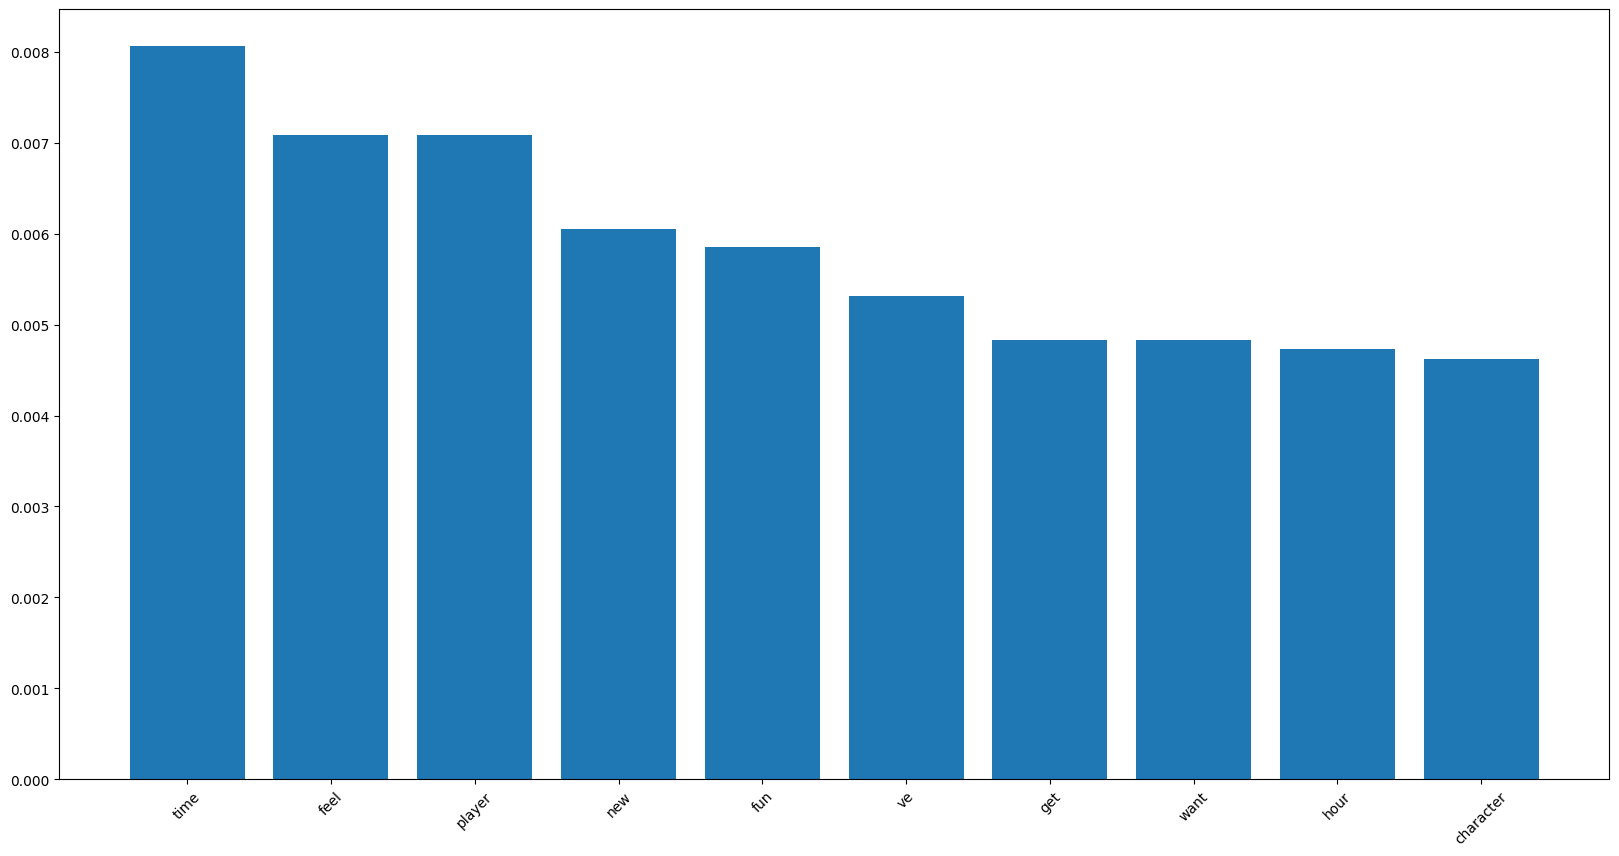

In [100]:
#plot the 10 most common words
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [101]:
#train a logistic regression model using the bag of words features as X and the sentiment column as y
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6458333333333334

In [103]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [104]:
top_10_negative

,feature,coefficient
3255,standard,-0.412824
2025,look,-0.431141
1335,game like,-0.443985
3108,shop,-0.493246
2014,lol,-0.502509
1177,free,-0.512658
2289,nice,-0.526055
96,amazing,-0.527906
2695,pretty,-0.577625
1520,good game,-0.688391


In [105]:
top_10_positive

,feature,coefficient
623,crash,0.776530
311,boring,0.771183
2654,poor,0.655286
2176,miss,0.647654
324,break,0.626118
314,bot,0.613272
457,cheater,0.610000
3612,unplayable,0.597822
3101,shit,0.596188
1126,fix,0.558625


In [111]:
#train a logistic regression model using the bag of words features as X and the simplified_category column as y
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = reviews['simplified_category']
y = y.fillna('Unknown')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [112]:
accuracy_score(y_test, y_pred)

1.0

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.515625

In [118]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [119]:
top_10_positive

,feature,coefficient
2748,pubg,0.678724
348,bug,0.672850
2223,ms,0.641879
751,destiny,0.640276
363,bungie,0.627728
190,away,0.620936
1850,join,0.617525
119,anymore,0.610847
2228,multiplayer,0.580856
3334,stuff,0.574438


In [120]:
top_10_negative

,feature,coefficient
277,bit,-0.273650
2522,people,-0.280903
3805,worth,-0.295628
3628,use,-0.296876
2015,long,-0.304444
3040,screen,-0.314197
18,account,-0.334330
2695,pretty,-0.339360
3,able,-0.367894
2704,price,-0.418708


In [121]:
!pip install gensim

In [122]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

corpus = Sparse2Corpus(X, documents_columns=False)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [123]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)
lda_model.print_topics()

[(0,
  '0.009*"player" + 0.008*"world" + 0.007*"time" + 0.005*"new" + 0.005*"story" + 0.005*"feel" + 0.005*"character" + 0.004*"online" + 0.004*"way" + 0.004*"gameplay"'),
 (1,
  '0.008*"time" + 0.007*"want" + 0.006*"feel" + 0.006*"player" + 0.006*"look" + 0.005*"new" + 0.005*"great" + 0.005*"ve" + 0.005*"buy" + 0.005*"get"'),
 (2,
  '0.009*"character" + 0.009*"fun" + 0.008*"feel" + 0.007*"time" + 0.007*"player" + 0.005*"bad" + 0.005*"story" + 0.005*"new" + 0.005*"go" + 0.005*"ve"'),
 (3,
  '0.006*"player" + 0.006*"great" + 0.005*"story" + 0.005*"recommend" + 0.005*"time" + 0.005*"feel" + 0.005*"buy" + 0.004*"server" + 0.004*"new" + 0.004*"hour"'),
 (4,
  '0.009*"fun" + 0.008*"ve" + 0.007*"time" + 0.006*"player" + 0.006*"new" + 0.006*"hour" + 0.006*"love" + 0.006*"feel" + 0.005*"find" + 0.005*"lot"'),
 (5,
  '0.008*"feel" + 0.008*"fun" + 0.007*"time" + 0.007*"ve" + 0.006*"player" + 0.006*"get" + 0.006*"gameplay" + 0.005*"bad" + 0.005*"experience" + 0.004*"want"'),
 (6,
  '0.012*"new" +

In [124]:
#check the topic distribution of a single review
lda_model.get_document_topics(corpus[30])

[(1, 0.57033277), (6, 0.39888415)]

In [126]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=reviews["review"][30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

After working for so long. Rockstar and their great wisdom decided to kill linux
support. I am assuming windows is going around paying off these companies to try
and kill valve and linux. I guess rockstar just wont be getting anymore of my
money.


In [127]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9
577,0.000918,0.000918,0.000918,0.991738,0.000918,0.000918,0.000918,0.000918,0.000918,0.000918
677,0.001124,0.001124,0.001124,0.989881,0.001124,0.001124,0.001124,0.001124,0.001124,0.001124
326,0.001640,0.001640,0.001640,0.985236,0.001641,0.001641,0.001640,0.001640,0.001641,0.001640
846,0.001787,0.001787,0.001787,0.983918,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787
366,0.001962,0.001962,0.001962,0.982345,0.001962,0.001962,0.001962,0.001962,0.001962,0.001962
...,...,...,...,...,...,...,...,...,...,...
836,0.000204,0.000204,0.163304,0.000204,0.000244,0.304237,0.000204,0.000204,0.530993,0.000204
851,0.000199,0.025355,0.300647,0.000199,0.047971,0.473805,0.144730,0.000199,0.006694,0.000199
844,0.000199,0.000199,0.575458,0.000199,0.060265,0.187772,0.000199,0.132690,0.042820,0.000199
48,0.000197,0.017229,0.000197,0.000197,0.000197,0.689495,0.078028,0.000197,0.214064,0.000197


In [130]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=reviews["review"][48]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

I usually only write Campaign reviews for my Call of Duty games but I feel
compelled to be 100% honest about Call of Duty®: Black Ops 6. I have played
every single CoD game to date, to 100% completion - Xbox, PC and PS. I have
played each zombies map and completed all Easter eggs to date also. The only CoD
game I have "passed" on is Vanguard (and for good reason).  Below I will write a
little about the zombies, multiplayer and campaign but first a quick disclaimer!
[b] This review is MY opinion, MY own personal experience and MY thoughts. I am
brutally honest when it comes to reviewing games. If you do not like my opinion,
my time or respect my personal experience, please move on. [/b]   [h1][b]
Multiplayer - All in one [/b][/h1]  The BAD aspects of MP: ⚫The Multiplayer is
no different from other CoD games. It's the same copy and pasted Multiplayer
with "omni movement" thrown in. At no point do you actually see anyone use this
mechanic but the "strafe run backwards, forwards, sideways"